In [85]:
import pandas as pd
import numpy as np
import networkx as nx
#%matplotlib notebook
import matplotlib.pyplot as plt

import os
import operator
import warnings
#warnings.filterwarnings('ignore')
import plotly.graph_objects as go


In [86]:
cols_list=["Source airport","Destination airport"]
G_df = pd.read_csv('routes.csv',usecols=cols_list)#solo tiene 2 columnas por CODIGOS
#Count_df = pd.read_csv('D:/Personal and studies/College/Semester 6/Social and information networks project/countries.txt')
cols_list=["City","Country","IATA","Latitude","Longitude"]
airport_df = pd.read_csv('airports.csv',usecols=cols_list)#5 columnas 

In [87]:
G_df.head(5)

,Source airport,Destination airport
0,AER,KZN
1,ASF,KZN
2,ASF,MRV
3,CEK,KZN
4,CEK,OVB


In [88]:
airport_df.head(5)

,City,Country,IATA,Latitude,Longitude
0,Goroka,Papua New Guinea,GKA,-6.081690,145.391998
1,Madang,Papua New Guinea,MAG,-5.207080,145.789001
2,Mount Hagen,Papua New Guinea,HGU,-5.826790,144.296005
3,Nadzab,Papua New Guinea,LAE,-6.569803,146.725977
4,Port Moresby,Papua New Guinea,POM,-9.443380,147.220001


node_trace = go.Scatter(
    x=[],
    y=[],
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2)
)

In [89]:

# Create a directed graph from the DataFrame
G = nx.from_pandas_edgelist(G_df.head(1000), 'Source airport', 'Destination airport',create_using=nx.DiGraph())

# Calculate the number of connections for each node
node_adjacencies = [len(adjacencies) for node, adjacencies in G.adjacency()]


# Create a trace for nodes with different sizes based on the number of connections
node_trace = go.Scatter(
    x=[],
    y=[],
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='Viridis',  # Use the 'Viridis' colorscale
        size=10,
        color=node_adjacencies,# Assign node_adjacencies directly to the color attribute
        opacity=1,#
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right',
            tickvals=[min(node_adjacencies), max(node_adjacencies)],
            ticktext=[str(min(node_adjacencies)), str(max(node_adjacencies))],
        ),
        line_width=2)
)



# Calculate the layout of the graph (positions of nodes)
pos = nx.spring_layout(G)

# Set the layout coordinates for the nodes in the node trace
node_trace.x = [pos[node][0] for node in G.nodes()]
node_trace.y = [pos[node][1] for node in G.nodes()]

# Set the size and text attributes based on the number of connections
#node_trace.marker.size = node_adjacencies
#node_trace.text = ['# of connections: ' + str(adjacencies) for adjacencies in node_adjacencies]
#Para el tamaño de nodos 
factor=3
node_trace.marker.size = [factor * size for size in node_adjacencies]  
node_trace.text = ['# of connections: ' + str(adjacencies) for adjacencies in node_adjacencies]

# Create a trace for edges using the layout information
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x += [x0, x1, None]
    edge_y += [y0, y1, None]

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    mode='lines',
    line=dict(width=2, color='#889'),
    hoverinfo='none'
)



# Set the text attribute based on airport-related information
nodes_with_attributes = list(G.nodes(data=True))
node_trace.text = [
    f'Node: {node}, # of connections: {adjacencies}'
    for (node, _), adjacencies in zip(nodes_with_attributes, node_adjacencies)
]



# Create the figure
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title='<br>Network graph',
                    titlefont_size=16,
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=10, l=5, r=5, t=10),
                    annotations=[dict(
                        text="",
                        showarrow=False,
                        xref="paper", yref="paper",
                        x=0.005, y=-0.002)],
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)
                ))

# Show the figure
fig.show()

### El mas simple con Mathplot:

In [90]:
G = nx.from_pandas_edgelist(G_df.head(1000), 'Source airport', 'Destination airport',create_using=nx.DiGraph())
#DiGraph itialize a graph with edges, name, or graph attributes
#This selects the first 10,000 rows of your DataFrame G_df. 'Source airport' and 'Destination airport':
# These are the column names in your DataFrame that represent the source and destination nodes for each edge

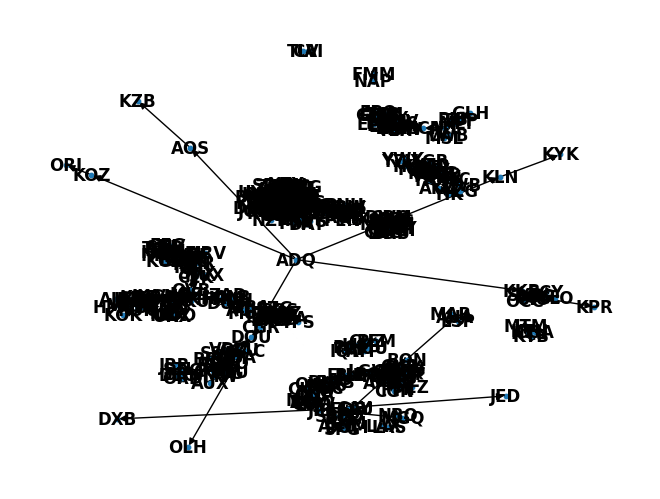

In [91]:
#Para el grafo mas basico
pos = nx.spring_layout(G)

# Draw the graph using Matplotlib
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=10)
plt.show()

After running this code, you have a directed graph G created from the first 10,000 rows of your DataFrame, where nodes represent airports, and edges represent routes between them.

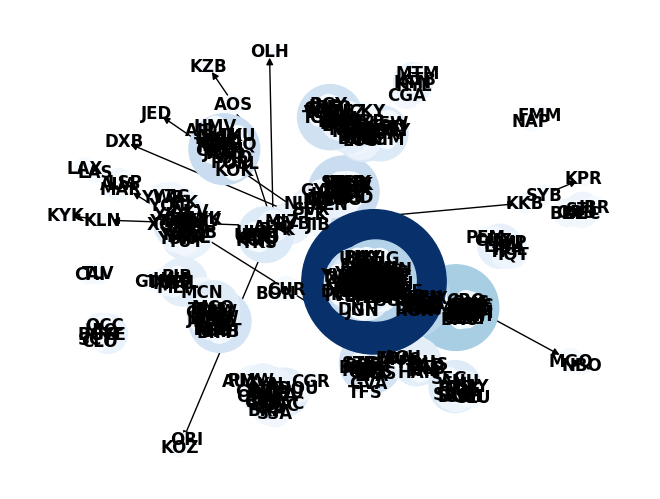

In [92]:
# Load the data
cols_list = ["Source airport", "Destination airport"]
G_df = pd.read_csv('routes.csv', usecols=cols_list)

# Create a directed graph
G = nx.from_pandas_edgelist(G_df.head(1000), 'Source airport', 'Destination airport', create_using=nx.DiGraph())

# Calculate the node degrees (number of connections)
node_degrees = dict(G.degree)

# Set node sizes based on degrees (you can adjust the scaling factor as needed)
node_sizes = [deg * 100 for deg in node_degrees.values()]

# Set node colors based on degrees
node_colors = list(node_degrees.values())

# Draw the graph using Matplotlib
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=node_sizes, node_color=node_colors, cmap=plt.cm.Blues)
plt.show()

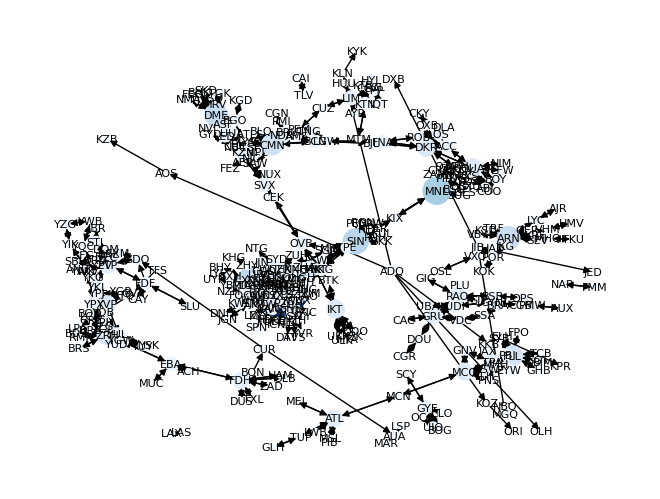

In [93]:
# Load the data
cols_list = ["Source airport", "Destination airport"]
G_df = pd.read_csv('routes.csv', usecols=cols_list)

# Create a directed graph
G = nx.from_pandas_edgelist(G_df.head(1000), 'Source airport', 'Destination airport', create_using=nx.DiGraph())

# Calculate the node degrees (number of connections)
node_degrees = dict(G.degree)

# Set node sizes based on degrees (you can adjust the scaling factor as needed)
node_sizes = [deg * 10 for deg in node_degrees.values()]

# Set node colors based on degrees
node_colors = list(node_degrees.values())

# Use a more organized layout with optimal distance between nodes
pos = nx.spring_layout(G, k=0.1)  # Adjust the 'k' value as needed

# Draw the graph using Matplotlib
nx.draw(G, pos, with_labels=False, font_weight='bold', node_size=node_sizes, node_color=node_colors, cmap=plt.cm.Blues)

# Add node labels with airport codes
node_labels = {node: node for node in G.nodes}
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=8)

plt.show()

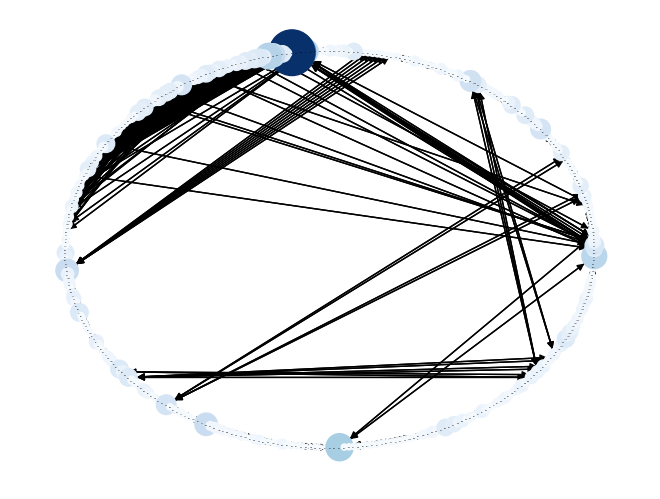

In [94]:
# Load the data
cols_list = ["Source airport", "Destination airport"]
G_df = pd.read_csv('routes.csv', usecols=cols_list)

# Create a directed graph
G = nx.from_pandas_edgelist(G_df.head(1000), 'Source airport', 'Destination airport', create_using=nx.DiGraph())

# Calculate the node degrees (number of connections)
node_degrees = dict(G.degree)

# Set node sizes based on degrees (you can adjust the scaling factor as needed)
node_sizes = [deg * 10 for deg in node_degrees.values()]

# Set node colors based on degrees
node_colors = list(node_degrees.values())

# Use a shell layout for more spacing
pos = nx.shell_layout(G)

# Draw the graph using Matplotlib
nx.draw(G, pos, with_labels=False, font_weight='bold', node_size=node_sizes, node_color=node_colors, cmap=plt.cm.Blues)

# Add node labels with airport codes
node_labels = {node: node for node in G.nodes}
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=1)

plt.show()